<a href="https://colab.research.google.com/github/edfakie2/Edward-Core-2/blob/main/Agriculture_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [85]:
df = pd.read_excel('/content/Seed_dataset.xlsx')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of Kernel         210 non-null    float64
 4   Width of Kernel          210 non-null    float64
 5   Asymmetry Coefficient    210 non-null    float64
 6   Length of Kernel Groove  210 non-null    float64
 7   Seed Type                210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [87]:
df.duplicated().sum()

0

In [88]:
df.isna().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of Kernel           0
Width of Kernel            0
Asymmetry Coefficient      0
Length of Kernel Groove    0
Seed Type                  0
dtype: int64

In [89]:
df.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Seed Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [90]:
## This data was super clean to start. I picked a pretty awesome dataset from that aspect

In [91]:
df.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Seed Type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [92]:
df['Seed Type'].value_counts()

1    70
2    70
3    70
Name: Seed Type, dtype: int64

In [93]:
## Its perfectly balanced too

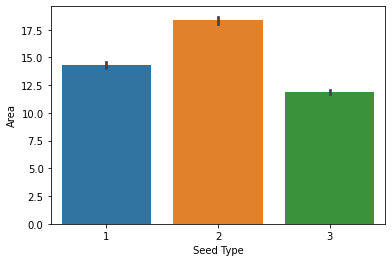

In [94]:
sns.barplot(x='Seed Type', y='Area', data=df);

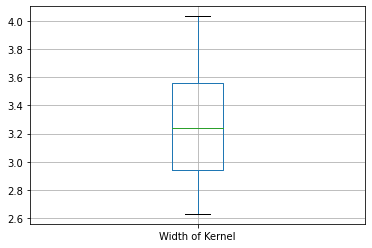

In [95]:
df.boxplot(column='Width of Kernel');

In [96]:
## This the most straight forward data ZERO outliers so far

In [97]:
corr = df.corr()

In [98]:
corr

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Seed Type
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Length of Kernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Width of Kernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmetry Coefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Length of Kernel Groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Seed Type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


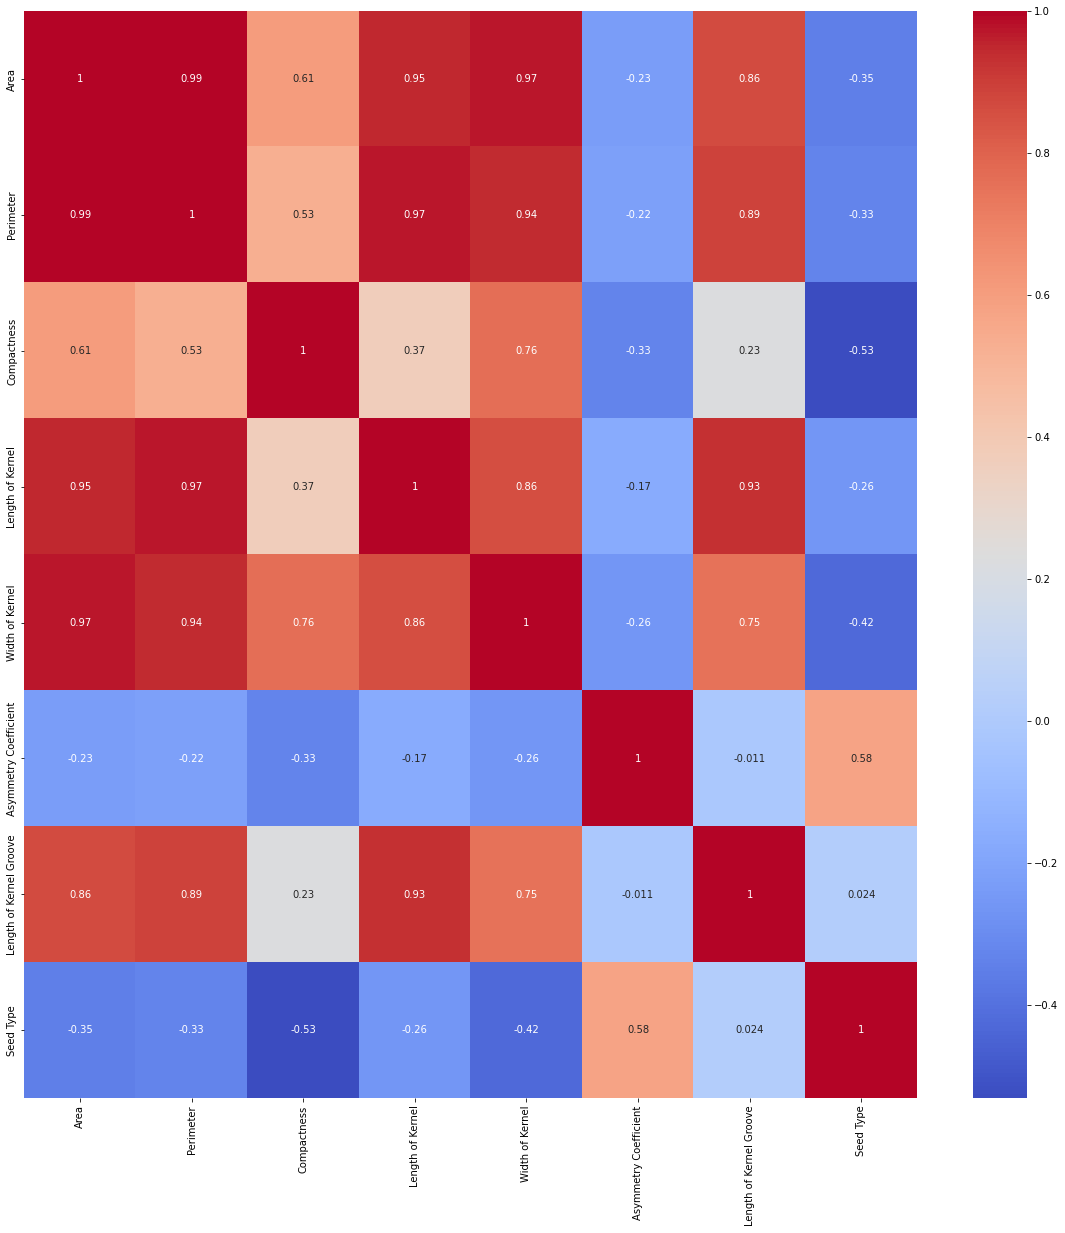

In [99]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm',annot=True);

In [100]:
## The model I'm going to build will be able to predict 100% I have zero doubt
## there are very strong corrilations for all different types of size measurments

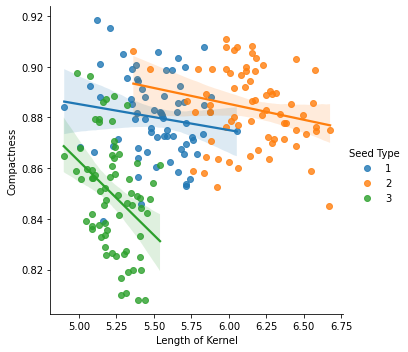

In [101]:
sns.lmplot(data=df,x='Length of Kernel', y='Compactness', hue='Seed Type', height=5);

In [102]:
## picked this combination on purpose it looks like Seed 1,2 specifically but even 3 have
## similarities from a compactness point of view I'm going to have to be careful how I group these
## in models

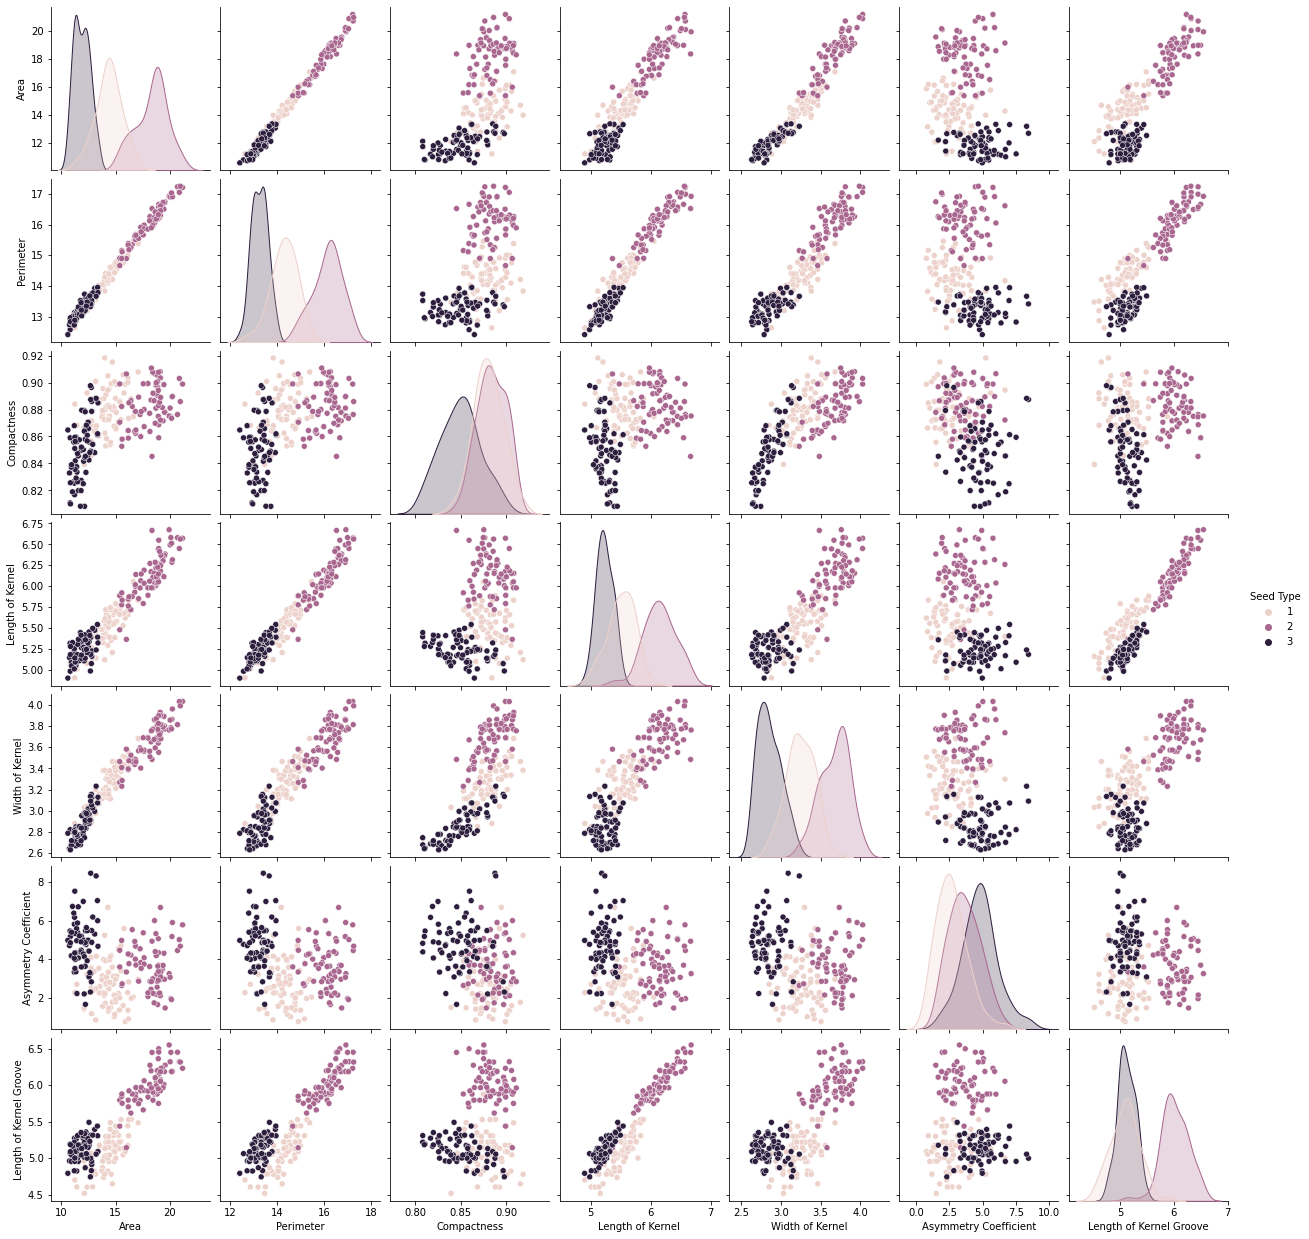

<Figure size 1440x1440 with 0 Axes>

In [103]:
sns.pairplot(df, hue='Seed Type');
plt.figure(figsize=(20,20));

In [104]:
## For the most part there seems to be clear seperation from the types of Seeds
## there are sitiations where models if not trained correctly will pull from very 
## similar characteristics for example Compactness/ Asymmety Coefficient 

In [105]:
X = df.drop(columns= ['Seed Type'])
y= df['Seed Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [106]:
num_selector = make_column_selector(dtype_include='number')

In [107]:
## all columns are numbers is is the only selector i'll need

In [108]:
scaler = StandardScaler()

In [109]:
## I shouldnt need to impute anything there are no missing values

In [110]:
num_pipe = make_pipeline(scaler)

In [111]:
num_tuple = (num_pipe, num_selector)

In [112]:
preprocessor = make_column_transformer(num_tuple, remainder ='drop')

In [113]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f05bf7926d0>)])

In [114]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [115]:
knn= KNeighborsClassifier()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [116]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [117]:
knn_train_preds = knn_pipe.predict(X_train)
knn_test_preds = knn_pipe.predict(X_test)

In [118]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score 

0.9245283018867925

In [119]:
dec_tree = DecisionTreeClassifier(random_state = 42)

In [120]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [157]:
dec_tree_pipe = make_pipeline(scaler, dec_tree)

In [158]:
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [159]:
dectree_train_preds = dec_tree_pipe.predict(X_train)
dectree_test_preds = dec_tree_pipe.predict(X_test)

In [160]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)


0.33121019108280253
0.33962264150943394


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [161]:
max_depth_range = list(range(2, 40))
r2 = []
# Runs the loop for depths in the max_depth_range.
for depth in max_depth_range:
    dec_tree_test = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dec_tree_pipe_test = make_pipeline(preprocessor, dec_tree_test)
    dec_tree_pipe_test.fit(X_train, y_train)
    score = dec_tree_pipe_test.score(X_test, y_test)
    r2.append(score)

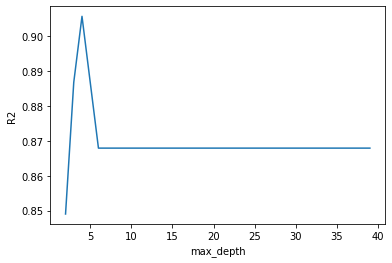

In [162]:
# Visualize which max_depth leads to the highest r2 score.
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

In [164]:
dec_tree_5 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
dec_tree_pipe_5 = make_pipeline(scaler, dec_tree_5)
dec_tree_pipe_5.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [165]:
dectree_train_preds5 = dec_tree_pipe_5.predict(X_train)
dectree_test_preds5 = dec_tree_pipe_5.predict(X_test)

In [166]:
train_score5 = dec_tree_5.score(X_train, y_train)
test_score5 = dec_tree_5.score(X_test, y_test)
print(train_score5)
print(test_score5)

0.33121019108280253
0.33962264150943394


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [167]:
## Judging by these results KNN is the model I want to spend more time developing

In [168]:
knn2= KNeighborsClassifier(n_neighbors=3, weights= 'distance', leaf_size=50)
knn_pipe2 = make_pipeline(scaler, knn)
knn_pipe2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [169]:
knn_train_preds2 = knn_pipe2.predict(X_train)
knn_test_preds2 = knn_pipe2.predict(X_test)

In [170]:
acc_score2 = knn_pipe2.score(X_test, y_test)
acc_score

0.9245283018867925

In [134]:
## Scores are identical let me try one more thing

In [171]:
pca = PCA(n_components=.99)
pca.fit(X_train_processed)

PCA(n_components=0.99)

In [172]:
pca_proc = make_pipeline(scaler, pca)

In [173]:
knn_pca_pipe = make_pipeline(pca_proc, knn)
knn_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.99))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [174]:
print('Training accuracy:', knn_pca_pipe.score(X_train, y_train))
print('Testing accuracy:', knn_pca_pipe.score(X_test, y_test))

Training accuracy: 0.9490445859872612
Testing accuracy: 0.9245283018867925


In [175]:
## Still the same score

In [176]:
## I think because i fit the PCA on already scaled data that it work more efffectively


In [177]:
knn_pca_pipe2 = make_pipeline(pca, knn)
knn_pca_pipe2.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.99)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [178]:
print('Training accuracy:', knn_pca_pipe2.score(X_train, y_train))
print('Testing accuracy:', knn_pca_pipe2.score(X_test, y_test))

Training accuracy: 0.9171974522292994
Testing accuracy: 0.9622641509433962


In [144]:
## Results seem to speak for themselves

In [145]:
##Lets try one more 

In [179]:
input_shape = X_train_processed.shape[1]

In [180]:
input_shape

7

In [181]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

encoder = LabelEncoder()
 
encoder.fit(y_train)
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)
 

classes = encoder.classes_
 
binarizer = LabelBinarizer()
 
binarizer.fit(y_train_enc)
y_train_bin = binarizer.transform(y_train_enc)
y_test_bin = binarizer.transform(y_test_enc)
 

print('Original Target')
print(y_train.head())
 
print('\nEncoded Target')
print(y_train_enc[:5])
 
print('\nBinarized Target')
print(y_train_bin[:5])

Original Target
29     1
19     1
135    2
139    2
66     1
Name: Seed Type, dtype: int64

Encoded Target
[0 0 1 1 0]

Binarized Target
[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [1 0 0]]


In [182]:
multi_model = Sequential()
num_classes = len(classes)
 

multi_model.add(Dense(7, input_dim=input_shape, activation='relu'))
multi_model.add(Dense(5, activation='relu'))
multi_model.add(Dense(4, activation='relu'))
multi_model.add(Dense(3, activation='relu'))
multi_model.add(Dense(num_classes, activation='softmax'))
multi_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 5)                 40        
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
 dense_9 (Dense)             (None, 3)                 12        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [183]:
multi_model.compile(loss='categorical_crossentropy', 
                    optimizer='adam', 
                    metrics=['accuracy',
                             metrics.Precision(),
                             metrics.Recall()])

In [184]:
history = multi_model.fit(X_train_processed, y_train_bin,
                          validation_data=(X_test_processed, y_test_bin),
                          epochs=200,
                          verbose=0)

In [185]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

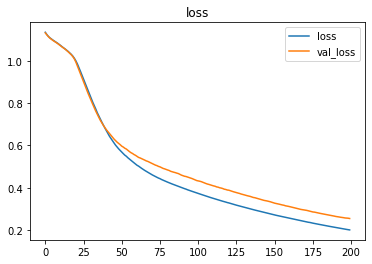

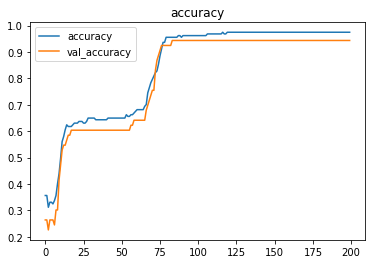

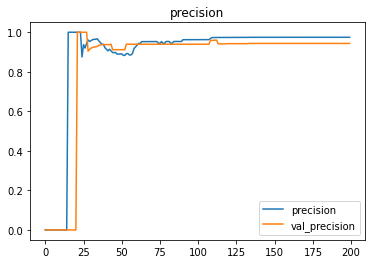

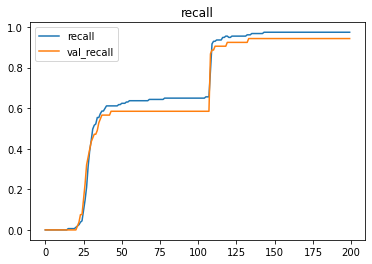

In [153]:
plot_history(history)

In [154]:
raw_pred = multi_model.predict(X_test_processed)
 

print('Raw Predictions\n', raw_pred[:5])
print('\nbinarized y_test\n', y_test_bin[:5])

Raw Predictions
 [[9.6964610e-01 1.3825536e-02 1.6528390e-02]
 [5.8188349e-02 2.2444008e-01 7.1737158e-01]
 [1.5542213e-08 9.9961436e-01 3.8557753e-04]
 [8.5520506e-01 4.8918039e-02 9.5876984e-02]
 [7.0784175e-01 8.2805708e-02 2.0935248e-01]]

binarized y_test
 [[1 0 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]]


In [155]:
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)
 
print('integer predictions', y_pred)
print('integer true labels', y_true)

integer predictions [0 2 1 0 0 2 0 2 0 2 1 2 2 1 0 1 0 0 2 1 1 0 2 1 1 2 0 1 0 2 2 2 1 0 1 1 2
 1 1 2 2 2 2 1 2 0 2 1 1 0 0 2 1]
integer true labels [0 2 1 2 0 2 0 2 0 2 1 2 2 1 0 1 2 0 2 1 1 0 2 1 1 2 0 1 0 2 2 0 1 0 1 1 2
 1 1 2 2 2 2 1 2 0 2 1 1 0 0 2 1]


              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       1.00      1.00      1.00        18
           2       0.95      0.90      0.93        21

    accuracy                           0.94        53
   macro avg       0.94      0.94      0.94        53
weighted avg       0.94      0.94      0.94        53



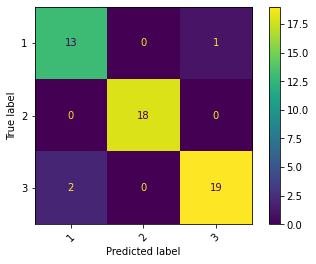

In [156]:
print(classification_report(y_true, y_pred))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        display_labels=classes,
                                        xticks_rotation=45);

In [ ]:
## I think these results are wonderful on such a small dataset more data will be required to get the model to 100%